### Analizando resultados parámetros por pareja

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set()

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df_MB = pd.read_csv('../Data/MBiases_simulated.csv')
df_WS = pd.read_csv('../Data/WSLS_simulated.csv')
df_FR = pd.read_csv('../Data/FRA_simulated.csv')

In [5]:
df_MB['Model'] = 'MBiases'
df_WS['Model'] = 'WSLS'
df_FR['Model'] = 'FRA'
df = pd.concat([df_MB, df_WS, df_FR])
df.head(2)

,Dyad,Round,Player,Answer,Time,a11,a12,a13,a14,a15,...,Similarity,Score_LAG1,Norm_Score_LAG1,Consistency_LEAD1,Dif_consist_LAG1,Category_LAG1,RegionGo,RegionGo2,Similarity_LAG1,Model
0,1044813256,1,104482,Present,20,0,0,0,0,0,...,0.484375,NaN,NaN,0.340426,NaN,NaN,BOTTOM,NOTHING,NaN,MBiases
1,1044813256,2,104482,Absent,32,0,0,0,0,0,...,1.000000,26.0,0.9625,0.000000,NaN,RS,NOTHING,LEFT,0.484375,MBiases


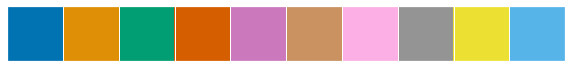

In [37]:
paleta = sns.color_palette('colorblind')
sns.palplot(paleta)
colores = {'WSLS':paleta[9], 'FRA':paleta[1], 'MBiases':paleta[5]}

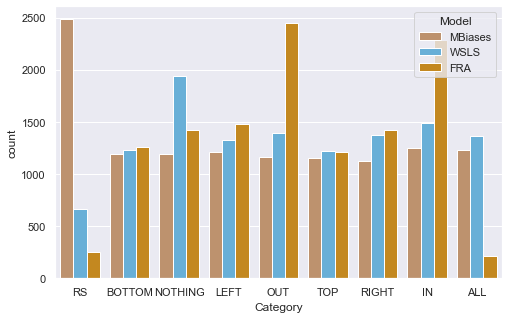

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot('Category', hue='Model', data=df, palette=colores)
plt.show()

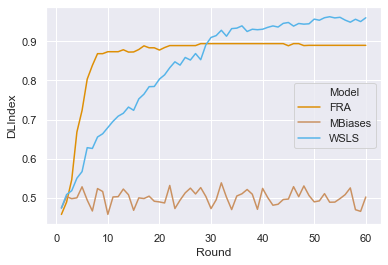

In [39]:
aux = df.groupby(['Model', 'Round'])['DLIndex'].mean().reset_index()
ax = sns.lineplot(x='Round', y='DLIndex', hue='Model', data=aux, palette=colores)
plt.show()

In [43]:
df.groupby('Model')['Joint'].value_counts()

Model  Joint
FRA    0        11234
       14         162
       16         134
       18          72
       32          64
                ...  
WSLS   24           6
       27           6
       2            2
       3            2
       30           2
Name: Joint, Length: 97, dtype: int64

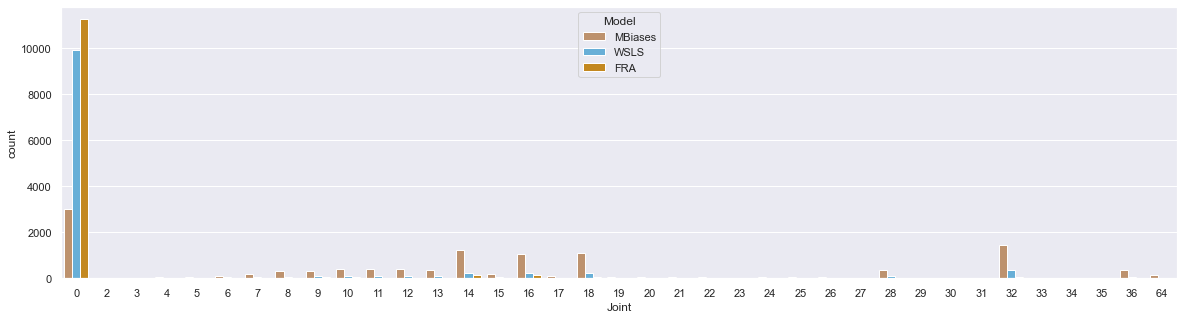

In [46]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot('Joint', hue='Model', data=df, palette=colores)
plt.show()

In [ ]:
from FRA import FRASim

cols = ['a' + str(i+1) + str(j+1) for i in range(8) for j in range(8)]

for dyad, grp in df.groupby(['Dyad', 'Round']):
    players = grp.Player.unique()
    pl1 = grp[grp['Player']==players[0]]
    pl2 = grp[grp['Player']==players[1]]
    region1 = pl1[cols].apply(lambda x: list(x), axis=1)
    region2 = pl2[cols].apply(lambda x: list(x), axis=1)
    overlap = np.multiply(region1, region2)
    print(overlap)

#df['overlap'] = df.apply(lambda x: find_overlap(x), axis=1)

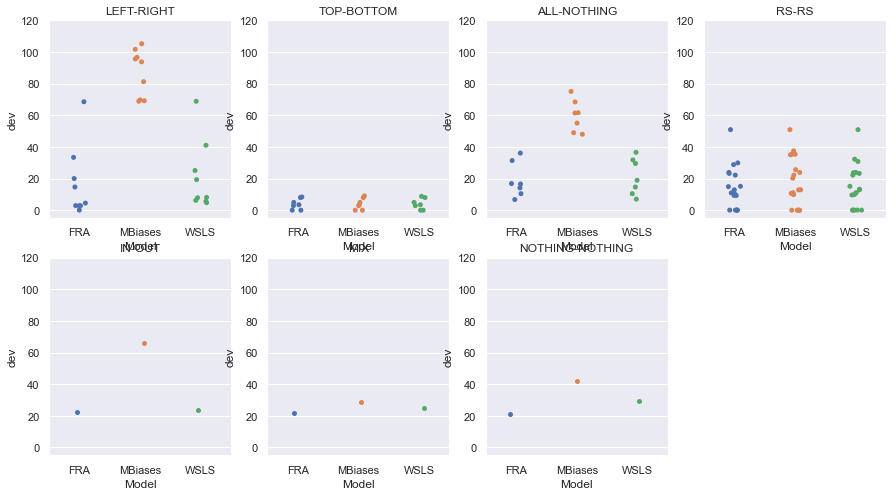

In [162]:
fig = plt.figure(figsize=(15,8))
split = df_fitted['DL'].unique()
for i, sp in enumerate(split):
    df = df_fitted[df_fitted['DL']==sp].sort_values(by='Model')
    plt.subplot(2,4,i+1)
    ax = sns.stripplot(x='Model', y='dev', data=df)
    ax.set_ylim([-5,120])
    plt.xlabel('Model')
    plt.ylabel('dev')
    plt.title(sp)
plt.show()